

---


# Credit Card Data Fraud Analysis


---



### total transactions data flat file

Filter food products by nutritional information. Serving size is 100g for all items.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("TotalBase.csv")
df.columns

Index(['Card_Number', 'Card_Family', 'Credit_Limit', 'Cust_ID',
       'Transaction_ID', 'Transaction_Date', 'Credit_Card_ID',
       'Transaction_Value', 'Transaction_Segment', 'Cust_ID.1', 'Age',
       'Customer_Segment', 'Customer_Vintage_Group', 'Transaction_ID.1',
       'Fraud_Flag'],
      dtype='object')

In [2]:
df.head()

,Card_Number,Card_Family,Credit_Limit,Cust_ID,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Value,Transaction_Segment,Cust_ID.1,Age,Customer_Segment,Customer_Vintage_Group,Transaction_ID.1,Fraud_Flag
0,1629-9566-3285-2123,Platinum,194000,CC24544,CTID28830551,24-Apr-16,1629-9566-3285-2123,23649,SEG25,CC24544,23,Gold,VG3,NaN,NaN
1,3697-6001-4909-5350,Gold,15000,CC62261,CTID45504917,11-Feb-16,3697-6001-4909-5350,26726,SEG16,CC62261,48,Gold,VG3,NaN,NaN
2,5864-4475-3659-1440,Gold,2000,CC99402,CTID47312290,01-Nov-16,5864-4475-3659-1440,22012,SEG14,CC99402,23,Diamond,VG1,NaN,NaN
3,5991-4421-8476-3804,Gold,19000,CC14871,CTID25637718,28-Jan-16,5991-4421-8476-3804,37637,SEG17,CC14871,44,Platinum,VG2,NaN,NaN
4,1893-8853-9900-8478,Premium,417000,CC11165,CTID66743960,17-Mar-16,1893-8853-9900-8478,5113,SEG14,CC11165,42,Gold,VG3,NaN,NaN


In [3]:
data = np.array([len(df[col].unique()) for col in df.columns]).reshape(1,-1)
unique_total = pd.DataFrame(data, columns = df.columns)
unique_total

,Card_Number,Card_Family,Credit_Limit,Cust_ID,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Value,Transaction_Segment,Cust_ID.1,Age,Customer_Segment,Customer_Vintage_Group,Transaction_ID.1,Fraud_Flag
0,500,3,293,482,10000,366,500,9035,15,482,31,3,3,110,2


In [4]:
df['Card_Family'].unique()

array(['Platinum', 'Gold', 'Premium'], dtype=object)

In [5]:
df['Card_Family'] = df['Card_Family'].map({'Platinum': 0, 'Gold': 1, 'Premium': 2})

In [6]:
years, months = [], []
for date in df['Transaction_Date']:
    items = date.split('-')
    years.append('20' + items[2])
    months.append(items[1])

In [7]:
# get unique months
np.array(set(months))

array({'Sep', 'Feb', 'Mar', 'Jan', 'Oct', 'Aug', 'Apr', 'Dec', 'Jul', 'May', 'Nov', 'Jun'},
      dtype=object)

In [8]:
# every month appears to be represented so we'll use this in our predictor variables
df['Transaction_Month'] = months

In [9]:
df['Transaction_Month'] = df['Transaction_Month'].map({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, \
                                                         'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})

In [10]:
# get unique years
set(years)
# since there is only one year we'll leave this out from our predictor variables

{'2016'}

In [11]:
df['Transaction_Segment'].unique()

array(['SEG25', 'SEG16', 'SEG14', 'SEG17', 'SEG13', 'SEG21', 'SEG18',
       'SEG12', 'SEG22', 'SEG19', 'SEG23', 'SEG11', 'SEG24', 'SEG20',
       'SEG15'], dtype=object)

In [12]:
# sort the transaction segment list
seg = list(df['Transaction_Segment'].unique())
seg.sort()
np.array(seg)

array(['SEG11', 'SEG12', 'SEG13', 'SEG14', 'SEG15', 'SEG16', 'SEG17',
       'SEG18', 'SEG19', 'SEG20', 'SEG21', 'SEG22', 'SEG23', 'SEG24',
       'SEG25'], dtype='<U5')

In [13]:
df['Transaction_Segment'] = df['Transaction_Segment'].map({'SEG11': 1, 'SEG12': 2, 'SEG13': 3, 'SEG14': 4, 'SEG15': 5, \
                                                             'SEG16': 6, 'SEG17': 7, 'SEG18': 8, 'SEG19': 9, 'SEG20': 10, \
                                                             'SEG21': 11, 'SEG22': 12, 'SEG23': 13, 'SEG24': 14, 'SEG25': 15})

In [14]:
df['Customer_Segment'].unique()

array(['Gold', 'Diamond', 'Platinum'], dtype=object)

In [15]:
df['Customer_Segment'] = df['Customer_Segment'].map({'Gold': 0, 'Diamond': 1, 'Platinum': 2})

In [16]:
df['Customer_Vintage_Group'].unique()

array(['VG3', 'VG1', 'VG2'], dtype=object)

In [17]:
df['Customer_Vintage_Group'] = df['Customer_Vintage_Group'].map({'VG1': 0, 'VG2': 1, 'VG3': 2})

In [18]:
df['Fraud_Flag'].unique()

array([nan,  1.])

In [19]:
# convert fraud flag column to binary values
df['Fraud_Flag'] = df['Fraud_Flag'].map({np.nan: 0, 1: 1})

In [20]:
df.head()

,Card_Number,Card_Family,Credit_Limit,Cust_ID,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Value,Transaction_Segment,Cust_ID.1,Age,Customer_Segment,Customer_Vintage_Group,Transaction_ID.1,Fraud_Flag,Transaction_Month
0,1629-9566-3285-2123,0,194000,CC24544,CTID28830551,24-Apr-16,1629-9566-3285-2123,23649,15,CC24544,23,0,2,NaN,0,4
1,3697-6001-4909-5350,1,15000,CC62261,CTID45504917,11-Feb-16,3697-6001-4909-5350,26726,6,CC62261,48,0,2,NaN,0,2
2,5864-4475-3659-1440,1,2000,CC99402,CTID47312290,01-Nov-16,5864-4475-3659-1440,22012,4,CC99402,23,1,0,NaN,0,11
3,5991-4421-8476-3804,1,19000,CC14871,CTID25637718,28-Jan-16,5991-4421-8476-3804,37637,7,CC14871,44,2,1,NaN,0,1
4,1893-8853-9900-8478,2,417000,CC11165,CTID66743960,17-Mar-16,1893-8853-9900-8478,5113,4,CC11165,42,0,2,NaN,0,3


In [21]:
import matplotlib.pyplot as plt

corr = df.corr()
corr.style.background_gradient(cmap='binary')

,Card_Family,Credit_Limit,Transaction_Value,Transaction_Segment,Age,Customer_Segment,Customer_Vintage_Group,Fraud_Flag,Transaction_Month
Card_Family,1,0.647977,0.00392537,-0.00683269,0.00845927,-0.0616408,0.0718989,1.16606e-05,-0.013309
Credit_Limit,0.647977,1,-0.00666127,-0.00126913,-0.0128779,0.0156867,0.0234696,-0.00570406,-0.0216998
Transaction_Value,0.00392537,-0.00666127,1,-0.00576552,-0.00173858,-0.00516142,-0.000226784,0.0149764,0.00289522
Transaction_Segment,-0.00683269,-0.00126913,-0.00576552,1,-0.00452223,0.0107876,-0.00281304,-0.00251258,0.0106722
Age,0.00845927,-0.0128779,-0.00173858,-0.00452223,1,0.019235,0.0293911,-0.00652548,0.000764042
Customer_Segment,-0.0616408,0.0156867,-0.00516142,0.0107876,0.019235,1,-0.524703,0.0150165,-0.00715804
Customer_Vintage_Group,0.0718989,0.0234696,-0.000226784,-0.00281304,0.0293911,-0.524703,1,-0.0153159,0.0126271
Fraud_Flag,1.16606e-05,-0.00570406,0.0149764,-0.00251258,-0.00652548,0.0150165,-0.0153159,1,8.35811e-05
Transaction_Month,-0.013309,-0.0216998,0.00289522,0.0106722,0.000764042,-0.00715804,0.0126271,8.35811e-05,1


In [22]:
df1 = df.loc[df['Fraud_Flag'] == 1]
df1.shape

(109, 16)

In [23]:
df1 = df1.drop(columns=['Fraud_Flag'])
# df1['Fraud_Flag'] = 1
df1.head()

,Card_Number,Card_Family,Credit_Limit,Cust_ID,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Value,Transaction_Segment,Cust_ID.1,Age,Customer_Segment,Customer_Vintage_Group,Transaction_ID.1,Transaction_Month
102,4246-1369-3659-8804,0,105000,CC21111,CTID50558449,06-May-16,4246-1369-3659-8804,6984,13,CC21111,43,2,1,CTID50558449,5
219,1336-9200-1264-2551,2,280000,CC16420,CTID55936882,29-Nov-16,1336-9200-1264-2551,34367,11,CC16420,22,0,2,CTID55936882,11
336,8528-6154-7390-5081,2,686000,CC90833,CTID63762180,05-Dec-16,8528-6154-7390-5081,44550,5,CC90833,32,1,0,CTID63762180,12
494,7908-2695-7391-7499,1,34000,CC53797,CTID76723439,15-Sep-16,7908-2695-7391-7499,48275,6,CC53797,35,1,0,CTID76723439,9
560,2524-4184-5908-6750,0,150000,CC69171,CTID21246201,29-Feb-16,2524-4184-5908-6750,35751,15,CC69171,41,1,0,CTID21246201,2


In [24]:
corr = df1.corr()
corr.style.background_gradient(cmap='binary')

,Card_Family,Credit_Limit,Transaction_Value,Transaction_Segment,Age,Customer_Segment,Customer_Vintage_Group,Transaction_Month
Card_Family,1,0.608843,0.0764589,-0.0235414,0.110209,-0.152057,0.127538,-0.0727637
Credit_Limit,0.608843,1,0.0573201,-0.0651182,0.0734841,0.0871705,0.0354692,-0.121598
Transaction_Value,0.0764589,0.0573201,1,-0.0383738,-0.0699421,0.0460997,-0.208139,0.0954053
Transaction_Segment,-0.0235414,-0.0651182,-0.0383738,1,-0.111959,0.0453949,0.0570836,-0.0449295
Age,0.110209,0.0734841,-0.0699421,-0.111959,1,0.249809,-0.161534,-0.0769286
Customer_Segment,-0.152057,0.0871705,0.0460997,0.0453949,0.249809,1,-0.418491,0.0762587
Customer_Vintage_Group,0.127538,0.0354692,-0.208139,0.0570836,-0.161534,-0.418491,1,0.122119
Transaction_Month,-0.0727637,-0.121598,0.0954053,-0.0449295,-0.0769286,0.0762587,0.122119,1


In [25]:
import collections
val = df1['Transaction_Month']
counter=collections.Counter(val)
print(counter)
print(counter.keys())
print(counter.values())

Counter({9: 14, 12: 10, 2: 10, 6: 10, 1: 9, 3: 9, 8: 9, 4: 9, 10: 8, 5: 7, 11: 7, 7: 7})
dict_keys([5, 11, 12, 9, 2, 1, 10, 3, 7, 6, 8, 4])
dict_values([7, 7, 10, 14, 10, 9, 8, 9, 7, 10, 9, 9])


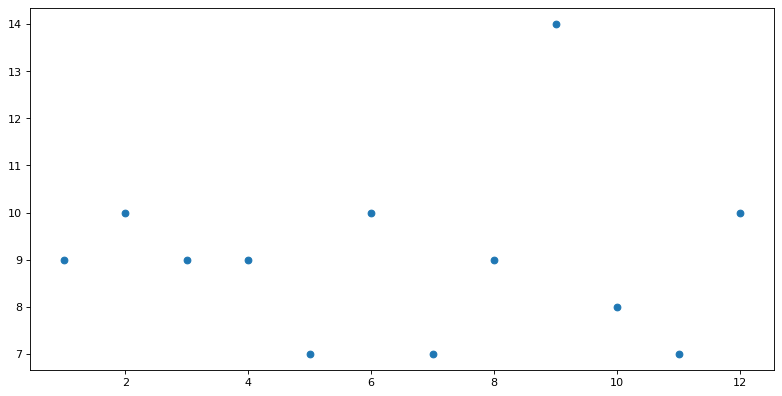

In [26]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(counter.keys(), counter.values())
# # plt.xlabel('month')
# plt.ylabel('fraud flag')

variables to use: Card_Family, Credit_Limit, Transaction_Value, Transaction_Segment, Customer_Segment, Customer_Vintage_Group, Transaction_Month

We see that credit limit is clustered around the low end for fraudulent cases which could signify low-income individuals. Transaction values are common between 30,000 to 40,000 dollars. Ages are random. A platinum card family holder is less likely to commit fraud than a gold or premium card holder.

A transaction segment of SEG11, a diamond customer segment, and a VG1 customer vintage group is far more likely to commit fraud.
Frauds also happen most often in September.

### Predictions of credit card fraud

Run exploratory data analysis with visualizations displaying fraud.

In [46]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [47]:
df.columns

Index(['Card_Number', 'Card_Family', 'Credit_Limit', 'Cust_ID',
       'Transaction_ID', 'Transaction_Date', 'Credit_Card_ID',
       'Transaction_Value', 'Transaction_Segment', 'Cust_ID.1', 'Age',
       'Customer_Segment', 'Customer_Vintage_Group', 'Transaction_ID.1',
       'Fraud_Flag', 'Transaction_Month'],
      dtype='object')

In [48]:
pred = df.drop(columns=['Card_Number', 'Cust_ID', 'Transaction_ID', 'Transaction_Date', 'Credit_Card_ID', 'Cust_ID.1', 'Age', \
                       'Transaction_ID.1', 'Fraud_Flag'])
pred.shape

(10000, 7)

In [49]:
resp = df['Fraud_Flag']
resp.shape

(10000,)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(pred, resp, test_size=0.2, random_state=44)

In [51]:
clf = LogisticRegression(random_state=1).fit(X_train, y_train)
clf.predict(X_train)
clf.predict_proba(X_train)
clf.score(X_train, y_train)

0.988625

In [64]:
i = 378 # arbitrary index
print("prediction: " + str(clf.predict(X_train[i:i+1])[0]))
print("actual: " + str(y_train[i]))

prediction: 0
actual: 0


In [65]:
incorrect = []
for i in range(len(X_train)):
    if clf.predict(X_train[i:i+1])[0] != y_train.iloc[i]:
        incorrect.append(i)

In [72]:
# # determine actual fraud flag values in incorrect predictions
# for i in incorrect:
#     print(df.iloc[i]['Fraud_Flag'])
print(incorrect[4])
df.iloc[336]

336


Card_Number               8528-6154-7390-5081
Card_Family                                 2
Credit_Limit                           686000
Cust_ID                               CC90833
Transaction_ID                   CTID63762180
Transaction_Date                    05-Dec-16
Credit_Card_ID            8528-6154-7390-5081
Transaction_Value                       44550
Transaction_Segment                         5
Cust_ID.1                             CC90833
Age                                        32
Customer_Segment                            1
Customer_Vintage_Group                      0
Transaction_ID.1                 CTID63762180
Fraud_Flag                                  1
Transaction_Month                          12
Name: 336, dtype: object

With a very high accuracy of 98.9% accuracy we can determine the likelihood of an individual commiting credit fraud given the predictor variables as train data.

Among the error in predictions in the train data there is one entry that has a fraud flag and this may because there are unlikely details of an individual who commits fraud such as this individuals high credit limit, and month in which the fraud was committed.